Part 1 Question 1
Group Members : Divya Mishra, Shreyansh Aswal, Vipin Gautam
Group id : ViDiSh

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [266]:
filename="C:\\Users\\user\\Downloads\\Old_Faithful_Geyser_Data_375_89.csv"
Y=np.zeros(272*2).reshape(272,2)

In [267]:
def load_csv_file():
    df=pd.read_csv(filename)
    j=0
    for index,row in df.iterrows():
        Y[j]=(row[2],row[3])
        j+=1

In [268]:
def determine_cluster(centroid_1,centroid_2):
    Y1=[]
    Y2=[]
    for row in Y:
        dist_1 = np.linalg.norm(centroid_1 - row)
        dist_2 = np.linalg.norm(centroid_2 - row)
        #dist_1 and dist_2 represent distance of a point from the two centroids. 
        if dist_1 > dist_2:
            Y2.append(row)
        else:
            Y1.append(row)
    return Y1,Y2

In [269]:
def centroid(X):
    sum_y=0
    sum_x=0
    c=np.zeros(2)
    for row in X:
        sum_x+=row[0]
        sum_y+=row[1]
    #Determining the value of the centroid of data points X
    c[0]=sum_x/len(X)
    c[1]=sum_y/len(X)
    return c


In [270]:
def calculate_centroids():
    #randomly selecting two values from the dataset as initial centroids
    c1_old=Y[23]
    c2_old=Y[0]
    global cnt
    while True:
        #Determine the cluster to which each point belongs to, based on the distance from the two centroids
        Y1,Y2=determine_cluster(c1_old,c2_old)
        
        c1_new=centroid(Y1)
        c2_new=centroid(Y2)
        #Converge condition, when the distance between the newly computed and old centroids is zero, we break from the loop
        if np.linalg.norm(c1_old - c1_new) ==0 and np.linalg.norm(c2_old - c2_new) ==0:
            break
        c1_old=c1_new
        c2_old=c2_new
    #return the computed centroids
    return c1_new,c2_new,Y1,Y2

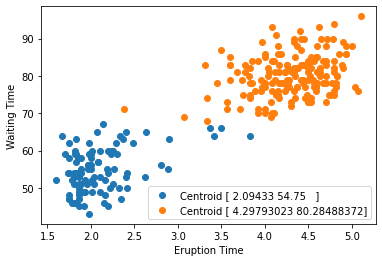

In [271]:
load_csv_file()
centroid_1,centroid_2,Y1,Y2=calculate_centroids()
x1=np.zeros(len(Y1)*2).reshape(2,len(Y1))
x2=np.zeros(len(Y2)*2).reshape(2,len(Y2))
j=0; k=0

for row in Y1:
    x1[0][j]=row[0]
    x1[1][j]=row[1]
    j+=1

for row in Y2:
    x2[0][k]=row[0]
    x2[1][k]=row[1]
    k+=1
plt.scatter(x1[0],x1[1])
plt.scatter(x2[0],x2[1])
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.legend(["Centroid {}".format(centroid_1),"Centroid {}".format(centroid_2)])
plt.show()
